# Imports

In [2]:
import acquire as a
import prepare as p
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
import unicodedata
from nltk.corpus import stopwords
from wordcloud import WordCloud
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('NLP_df.csv', index_col=0)

In [4]:
df = df.reset_index(drop=True)

In [5]:
df.shape

(112, 3)

In [6]:
df = df.drop_duplicates()

In [7]:
javascript_words = p.basic_clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
python_words = p.basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
go_words = p.basic_clean(' '.join(df[df.language == 'Go'].readme_contents))
java_words = p.basic_clean(' '.join(df[df.language == 'Java'].readme_contents))

In [8]:
stopword_list = stopwords.words('english')

In [9]:
javascript_words = p.remove_stopwords(javascript_words)
javascript_words = p.remove_stopwords(javascript_words)

In [10]:
language_words = [javascript_words, python_words, go_words, java_words]

In [11]:
for i in language_words:
    i = p.remove_stopwords(i)

In [12]:
df.shape

(109, 3)

---

# Creating Acquire and Prep Files

In [13]:
# def get_github_data():
#     df = pd.read_csv('NLP_df.csv', index_col=0)
#     df = df.reset_index(drop=True)
#     return df 

In [14]:
df = a.get_github_data()
df

,repo,language,readme_contents
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...
...,...,...,...
107,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m..."
108,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w..."
109,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...
110,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...


In [15]:
df = p.prep_github_data(df, 'readme_contents')

In [16]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15352,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,15072,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9882,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,82956,8170
...,...,...,...,...,...,...,...,...,...
102,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,5190,401
103,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...,5629,388
104,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,43444,2569
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11967,560


In [17]:
#df["clean"]= df["clean"].str.replace("&#9;", "")

In [18]:
#df["clean"].replace({"&#9;": ""}, inplace=True)

In [19]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15352,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,15072,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9882,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,82956,8170
...,...,...,...,...,...,...,...,...,...
102,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,5190,401
103,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...,5629,388
104,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,43444,2569
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11967,560


In [20]:
# #split the stuff here
# def split(df):
#     '''splitting our data, stratifying language.'''
#     train_validate, test = train_test_split(df, test_size=.2, 
#                                         random_state=123, 
#                                         stratify=df.language)
#     train, validate = train_test_split(train_validate, test_size=.3, 
#                                    random_state=123, 
#                                    stratify=train_validate.language)
#     return train, validate, test

In [21]:
train, validate, test = p.split(df)

In [22]:
train.shape, validate.shape, test.shape

((59, 9), (26, 9), (22, 9))

In [23]:
#not sure if I should stem or lemmatize yet
javascript_words = ' '.join(train[train.language == 'JavaScript'].clean)
python_words = ' '.join(train[train.language == 'Python'].clean)
java_words = ' '.join(train[train.language == 'Java'].clean)
go_words = ' '.join(train[train.language == 'Go'].clean)
all_words = ' '.join(train.clean)

In [24]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [25]:
word_counts = pd.concat([javascript_freq, python_freq, java_freq, go_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['javascript', 'python','java','go','all']
word_counts.head()

,javascript,python,java,go,all
source,928,56,7,16,1007
javascript,782,41,0,0,823
icon,430,0,0,0,430
freewarefreeware,395,0,0,0,395
const,388,0,0,0,388


In [26]:
word_counts.sort_values('all', ascending=False).head(10)

,javascript,python,java,go,all
source,928,56,7,16,1007
javascript,782,41,0,0,823
python,162,547,0,0,709
data,154,320,7,1,482
use,226,189,16,16,447
learning,33,410,1,0,444
icon,430,0,0,0,430
library,39,374,5,1,419
freewarefreeware,395,0,0,0,395
1,215,135,37,2,389


Text(0.5, 0, '\nFrequency')

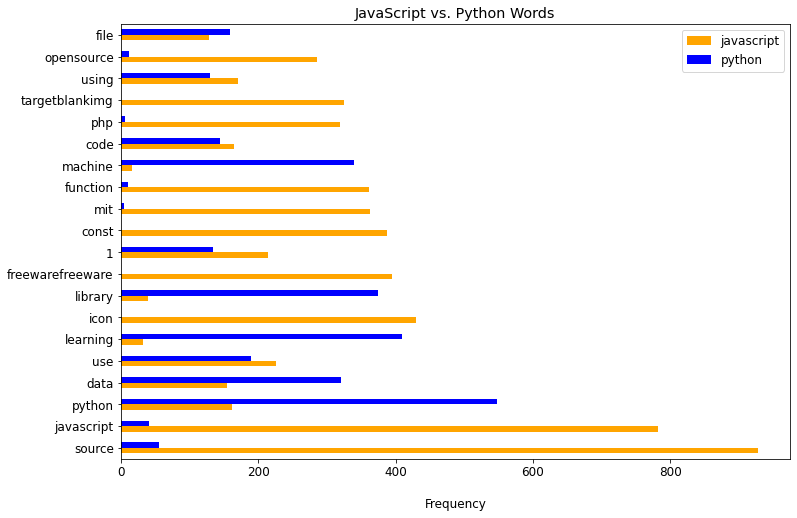

In [27]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'python']].plot.barh(figsize=(12,8), color={"python": "blue", "javascript": "orange"})
plt.title('JavaScript vs. Python Words')
plt.xlabel('\nFrequency')

Text(0.5, 0, '\nFrequency')

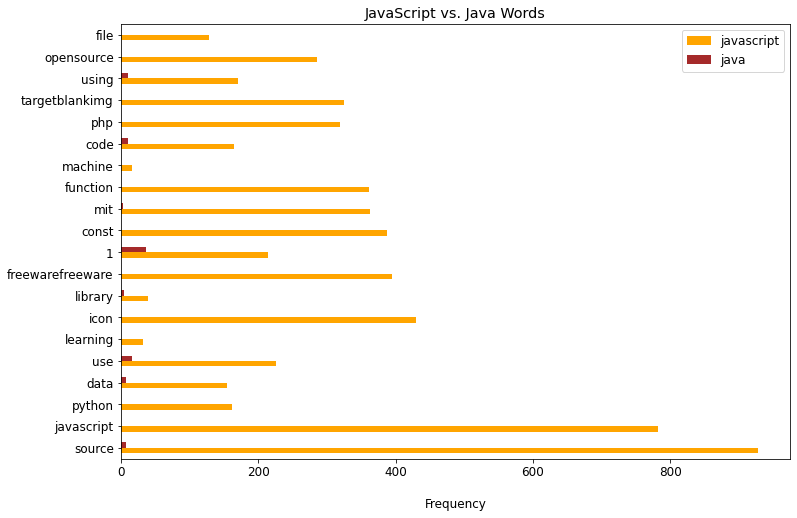

In [28]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'java']].plot.barh(figsize=(12,8), color={"java": "brown", "javascript": "orange"})
plt.title('JavaScript vs. Java Words')
plt.xlabel('\nFrequency')

Text(0.5, 0, '\nFrequency')

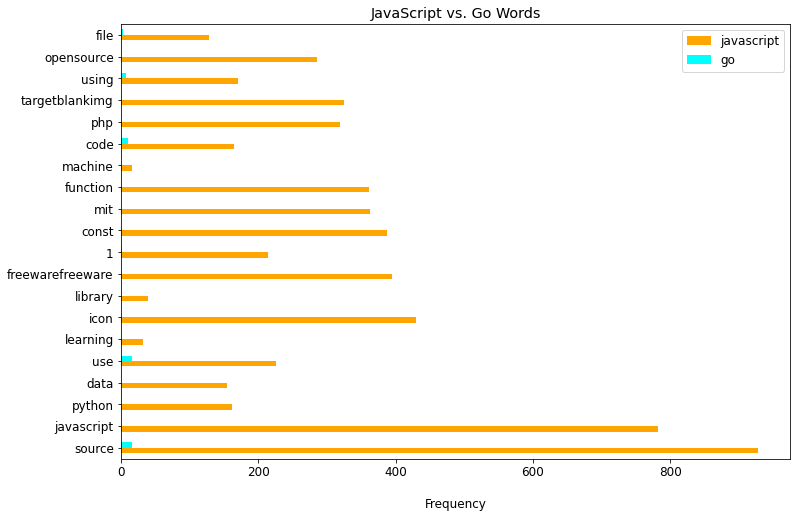

In [29]:
plt.rc('font', size=12)
word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'go']].plot.barh(figsize=(12,8), color={"go": "aqua", "javascript": "orange"})
plt.title('JavaScript vs. Go Words')
plt.xlabel('\nFrequency')

In [30]:
word_counts

,javascript,python,java,go,all
source,928,56,7,16,1007
javascript,782,41,0,0,823
icon,430,0,0,0,430
freewarefreeware,395,0,0,0,395
const,388,0,0,0,388
...,...,...,...,...,...
httpsimgshieldsiogithubdownloadsv2flyv2raycoretotalsvg,0,0,0,1,1
documentationhttpsgohugoiogettingstartedinstalling,0,0,0,1,1
githubcomspf13cobrav113,0,0,0,1,1
httpsquayiorepositoryprometheusprometheus,0,0,0,1,1


In [31]:
def javascript_barh():
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'python']].plot.barh(figsize=(12,8), color={"python": "blue", "javascript": "orange"})
    plt.title('JavaScript vs. Python Words')
    plt.xlabel('\nFrequency')
    plt.show()

    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'java']].plot.barh(figsize=(12,8), color={"java": "brown", "javascript": "orange"})
    plt.title('JavaScript vs. Java Words')
    plt.xlabel('\nFrequency')
    plt.show()
    
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'go']].plot.barh(figsize=(12,8), color={"go": "aqua", "javascript": "orange"})
    plt.title('JavaScript vs. Go Words')
    plt.xlabel('\nFrequency')
    plt.show()

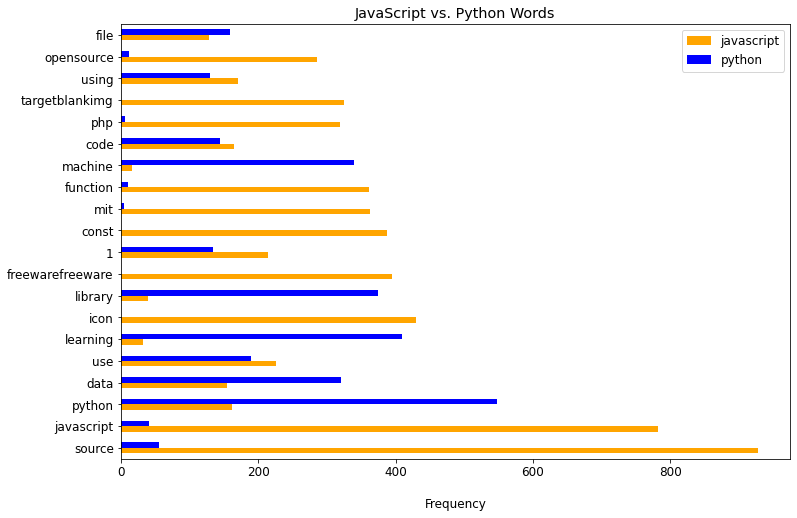

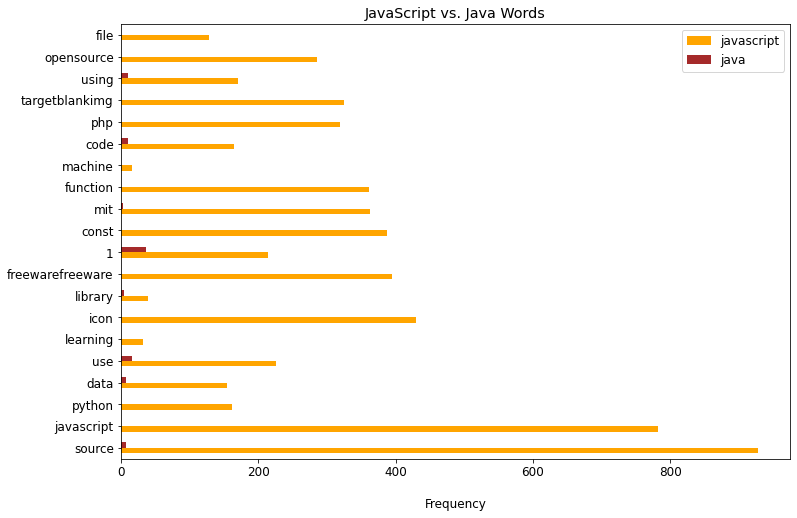

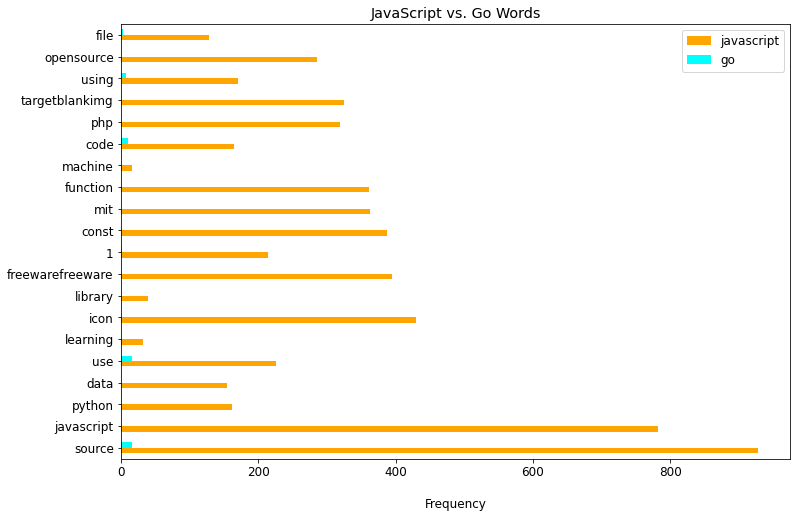

In [32]:
javascript_barh()

In [33]:
def python_barh():
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['javascript', 'python']].plot.barh(figsize=(12,8), color={"python": "blue", "javascript": "orange"})
    plt.title('JavaScript vs. Python Words')
    plt.xlabel('\nFrequency')
    plt.show()

    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['python', 'java']].plot.barh(figsize=(12,8), color={"java": "brown", "python": "blue"})
    plt.title('Python vs. Java Words')
    plt.xlabel('\nFrequency')
    plt.show()
    
    plt.rc('font', size=12)
    word_counts.sort_values('all', ascending=False).head(20)[['python', 'go']].plot.barh(figsize=(12,8), color={"go": "aqua", "python": "blue"})
    plt.title('Python vs. Go Words')
    plt.xlabel('\nFrequency')
    plt.show()

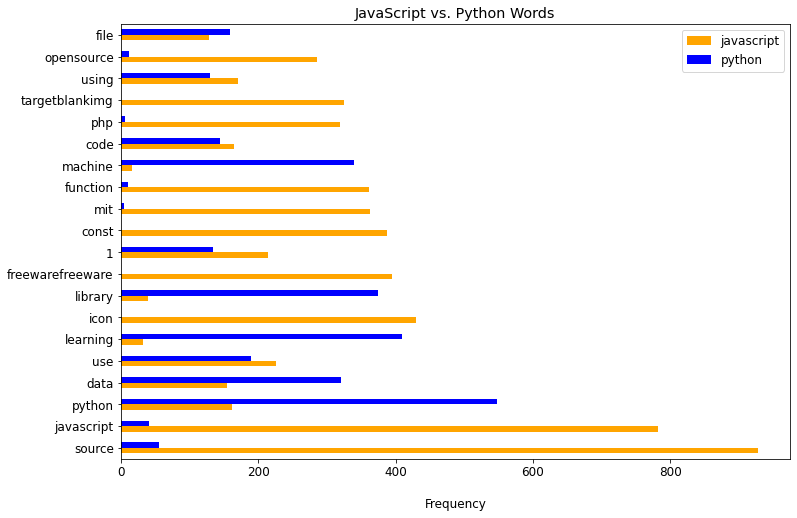

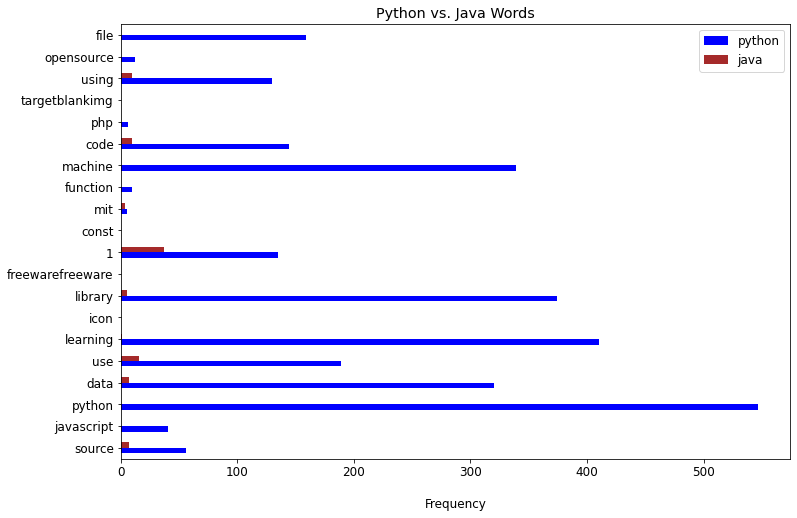

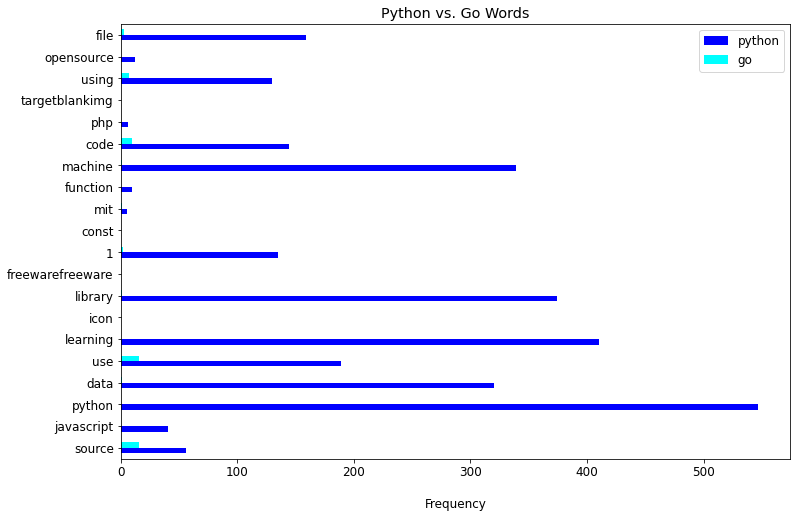

In [34]:
python_barh()

<Figure size 1152x720 with 0 Axes>

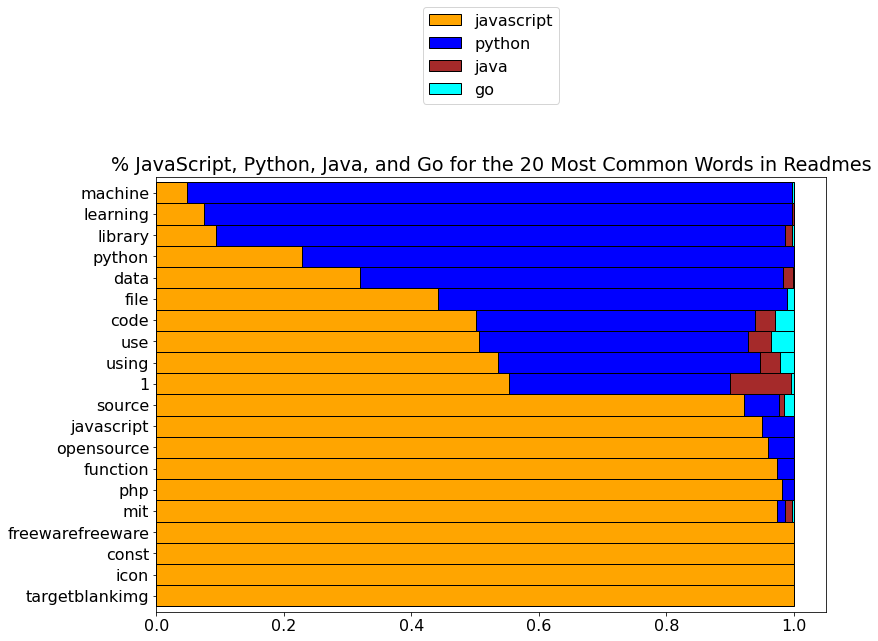

In [35]:
plt.figure(figsize=(16, 10))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .drop(columns='all')
 .sort_values(by='python')
 .plot.barh(stacked=True, width=1, ec='black', figsize=(12,8), color={"go": "aqua", "python": "blue", "javascript": "orange", "java":"brown"}))
plt.title('% JavaScript, Python, Java, and Go for the 20 Most Common Words in Readmes')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15))
#plt.gca().xaxis.set_major_formatter(plt.ticker.FuncFormatter('{:.0%}'.format))

(-0.5, 999.5, 599.5, -0.5)

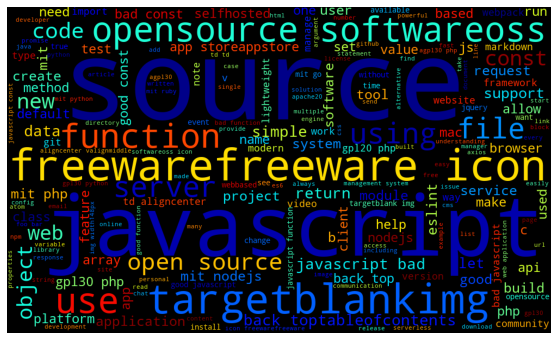

In [36]:
img = WordCloud(background_color='black', colormap = 'jet', width=1000, height=600).generate(javascript_words)
plt.figure(figsize=(12,6))
plt.imshow(img)
plt.axis('off')

In [37]:
def simple_wordcloud(language):
    img = WordCloud(background_color='black', colormap = 'jet',random_state=4, width=800, height=600).generate(language)
    plt.figure(figsize=(12,6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

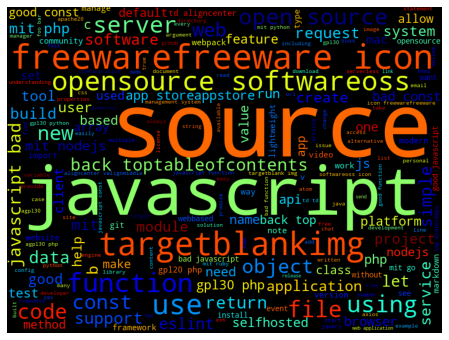

In [38]:
simple_wordcloud(javascript_words)

In [39]:
language_words = [javascript_words,python_words,java_words,go_words]

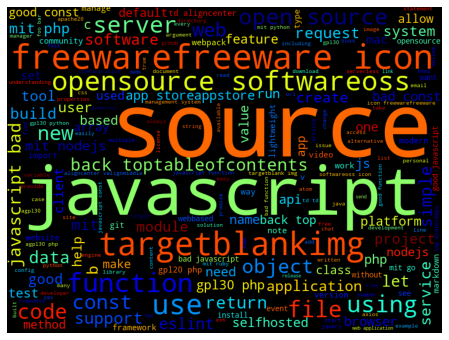

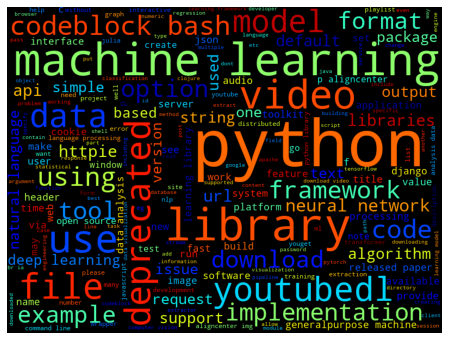

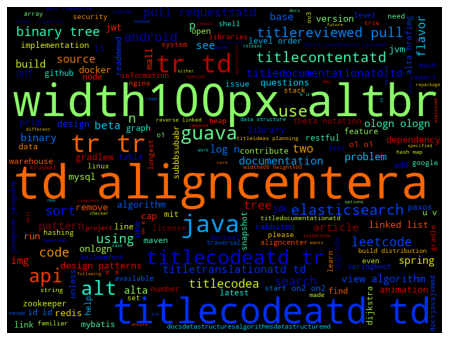

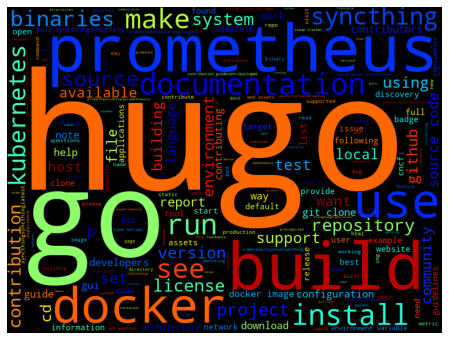

In [40]:
for i in language_words:
    simple_wordcloud(i)
    print('\n')

In [41]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15352,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,15072,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9882,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,82956,8170
...,...,...,...,...,...,...,...,...,...
102,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,5190,401
103,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...,5629,388
104,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,43444,2569
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11967,560


In [42]:
# import nltk.sentiment
# sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [43]:
#df['sentiment'] = df.clean.apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [44]:
#df.sentiment.plot.hist()

In [45]:
df

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15352,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,15072,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9882,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,82956,8170
...,...,...,...,...,...,...,...,...,...
102,gogs/gogs,Go,"# <img src=""https://github.com/gogs/gogs/raw/m...","# <img src=""https://github.com/gogs/gogs/raw/m...",img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,img srchttpsgithubcomgogsgogsrawmainpublicimgf...,5190,401
103,nuxt/nuxt.js,JavaScript,"<p align=""center""><img align=""center"" style=""w...","<p align=""center""><img align=""center"" style=""w...",p aligncenterimg aligncenter stylewidth320px s...,p aligncenterimg aligncent stylewidth320px src...,p aligncenterimg aligncenter stylewidth320px s...,5629,388
104,iptv-org/iptv,JavaScript,# IPTV\n\n![auto-update](https://github.com/ip...,# IPTV\n\n![auto-update](https://github.com/ip...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,iptv autoupdatehttpsgithubcomiptvorgiptvaction...,43444,2569
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11967,560


In [46]:
pd.Series(nltk.bigrams(javascript_words.split())).value_counts()

(freewarefreeware, icon)                    364
(opensource, softwareoss)                   234
(open, source)                              157
(back, toptableofcontents)                  113
(javascript, bad)                           111
                                           ... 
(although, leading)                           1
(interface, bad)                              1
(go, nginx)                                   1
(photonixhttpsphotonixorg, new)               1
(codehttpsgithubcomzedeusnitter, agpl30)      1
Length: 41246, dtype: int64

In [47]:
pd.Series(nltk.bigrams(python_words.split())).value_counts()

(machine, learning)                              270
(codeblock, bash)                                132
(bash, http)                                      86
(natural, language)                               66
(deep, learning)                                  61
                                                ... 
(libraries, jaxhttpsjaxreadthedocsioenlatest)      1
(website, list)                                    1
(federationfederation, sql)                        1
(frameworks, also)                                 1
(happens, try)                                     1
Length: 30006, dtype: int64

In [48]:
pd.Series(nltk.bigrams(java_words.split())).value_counts()

(width100px, altbr)                                                              172
(td, aligncentera)                                                               172
(titlecodeatd, td)                                                               100
(tr, td)                                                                          44
(tr, tr)                                                                          42
                                                                                ... 
(warehouse, kept)                                                                  1
(hrefhttpsgithubcomiluwatarjavadesignpatternscommitsauthoreas5, titlecodeatd)      1
(v40, pdf)                                                                         1
(clonegraphjava, pacificatlanticwaterflowjava)                                     1
(java, docsjavajvmjavamd)                                                          1
Length: 3538, dtype: int64

In [49]:
pd.Series(nltk.bigrams(go_words.split())).value_counts()

(source, code)                6
(git, clone)                  5
(docker, run)                 4
(pull, syncthingsyncthing)    4
(hugo, documentation)         4
                             ..
(dont, privileged)            1
(files, distributed)          1
(gopathsrck8sio, cd)          1
(docker, compose)             1
(hugo, version)               1
Length: 1567, dtype: int64

In [50]:
pd.Series(nltk.bigrams(all_words.split())).value_counts()

(freewarefreeware, icon)                    364
(machine, learning)                         276
(opensource, softwareoss)                   234
(open, source)                              200
(td, aligncentera)                          172
                                           ... 
(commercehttpsdrupalcommerceorg, drupal)      1
(videos, video)                               1
(php, algorithms)                             1
(training, models)                            1
(happens, try)                                1
Length: 75216, dtype: int64

In [51]:
df.head()

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
0,freeCodeCamp/freeCodeCamp,JavaScript,![freeCodeCamp.org Social Banner](https://s3.a...,![freeCodeCamp.org Social Banner](https://s3.a...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,freecodecamporg social bannerhttpss3amazonawsc...,15352,764
1,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","<p align=""center""><a href=""https://vuejs.org"" ...",p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,p aligncentera hrefhttpsvuejsorg targetblank r...,15072,861
2,facebook/react,JavaScript,# [React](https://reactjs.org/) &middot; [![Gi...,# [React](https://reactjs.org/) &middot; [![Gi...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,reacthttpsreactjsorg middot github licensehttp...,3656,322
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...,9882,606
4,public-apis/public-apis,Python,# Public APIs [![Run tests](https://github.com...,# Public APIs [![Run tests](https://github.com...,public apis run testshttpsgithubcompublicapisp...,public api run testshttpsgithubcompublicapispu...,public apis run testshttpsgithubcompublicapisp...,82956,8170


In [52]:
train.head()

,repo,language,readme_contents,original,clean,stemmed,lemmatized,readme_length,word_count
13,ytdl-org/youtube-dl,Python,[![Build Status](https://github.com/ytdl-org/y...,[![Build Status](https://github.com/ytdl-org/y...,build statushttpsgithubcomytdlorgyoutubedlwork...,build statushttpsgithubcomytdlorgyoutubedlwork...,build statushttpsgithubcomytdlorgyoutubedlwork...,57861,6995
100,prometheus/prometheus,Go,# Prometheus\n\n[![CircleCI](https://circleci....,# Prometheus\n\n[![CircleCI](https://circleci....,prometheus circlecihttpscirclecicomghprometheu...,prometheu circlecihttpscirclecicomghprometheus...,prometheus circlecihttpscirclecicomghprometheu...,4596,395
105,mermaid-js/mermaid,JavaScript,# mermaid [![Build Status](https://travis-ci.o...,# mermaid [![Build Status](https://travis-ci.o...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,mermaid build statushttpstravisciorgmermaidjsm...,11967,560
50,httpie/httpie,Python,HTTPie: human-friendly CLI HTTP client for the...,HTTPie: human-friendly CLI HTTP client for the...,httpie humanfriendly cli http client api era h...,httpie humanfriendli cli http client api era h...,httpie humanfriendly cli http client api era h...,38518,4677
12,vinta/awesome-python,Python,# Awesome Python [![Awesome](https://cdn.rawgi...,# Awesome Python [![Awesome](https://cdn.rawgi...,awesome python awesomehttpscdnrawgitcomsindres...,awesom python awesomehttpscdnrawgitcomsindreso...,awesome python awesomehttpscdnrawgitcomsindres...,70145,5604


### Statistical Testing:

#### Tailed T Tests

In [55]:
from scipy import stats

In [69]:
## creating categorized dataframes for each target variable value for statistical 
## testing purposes

python_df = train[train.language == 'Python'] ## creating a python df 
go_df = train[train.language == 'Go'] ## creating a go df
java_df = train[train.language == 'Java'] ## creating a Java df
javascript_df = train[train.language == 'JavaScript'] ## creating a JavaScript df

#### Comparing Readme Length 

In [67]:
alpha = 0.05 ## <-- Determining alpha for Readme Length Comparisons

##### Python Vs Go

$H_0$: Whether a readme is for a python repository or a go repository is independent of its read me character length.

$H_a$: Whether a readme is for a python repository or a go repository; the language category will have a significant impact on its read me character length.

In [56]:
t, p = stats.ttest_ind(python_df.readme_length,go_df.readme_length)
t, p

(1.8730261127002652, 0.07739835453118159)

##### Python Vs JavaScript

$H_0$: Whether a readme is for a python repository or a javascript repository is independent of its read me character length.

$H_a$: Whether a readme is for a python repository or a javascript repository; the language category will have a significant impact on its read me character length.

In [61]:
t, p = stats.ttest_ind(python_df.readme_length,javascript_df.readme_length)
t, p

(0.7647958700675219, 0.44866917815739693)

##### Python Vs Java

$H_0$: Whether a readme is for a python repository or a java repository is independent of its read me character length.

$H_a$: Whether a readme is for a python repository or a java repository; the language category will have a significant impact on its read me character length.

In [62]:
t, p = stats.ttest_ind(python_df.readme_length,java_df.readme_length)
t, p

(1.4402239936518584, 0.16607945065512192)

#### ReadMe Length Comparison Takeaways

 - All of the tailed t tests run on the different target variable values comparing readme character length returned insignifcant results
 - All languages versus python returned p values greater than our alpha of 0.05 
 - Therefore we can conclude that readme character length is independent of what programming language the repository is written.


#### Comparing Word Count Length

In [68]:
alpha = 0.05 ## <-- Determining alpha for Word Count Comparisons

##### Python Vs Go

$H_0$: Whether a readme is for a python repository or a go repository is independent of its read me word count.

$H_a$: Whether a readme is for a python repository or a go repository; the language category will have a significant impact on its read me word count.

In [63]:
t, p = stats.ttest_ind(python_df.word_count,go_df.word_count)
t, p

(1.9654645746753754, 0.06498266651964907)

##### Python Vs JavaScript

$H_0$: Whether a readme is for a python repository or a javascript repository is independent of its read me word count.

$H_a$: Whether a readme is for a python repository or a javascript repository; the language category will have a significant impact on its read me word count.

In [64]:
t, p = stats.ttest_ind(python_df.word_count,javascript_df.word_count)
t, p

(1.05837132519932, 0.29593549552880305)

##### Python Vs Java

$H_0$: Whether a readme is for a python repository or a java repository is independent of its read me word count.

$H_a$: Whether a readme is for a python repository or a java repository; the language category will have a significant impact on its read me word count.

In [65]:
t, p = stats.ttest_ind(python_df.word_count,java_df.word_count)
t, p

(1.837911764774864, 0.08176427090150006)

#### Word Count Comparison Takeaways

 - All of the tailed t tests run on the different target variable values comparing word count returned insignifcant results
 - All languages versus python returned p values greater than our alpha of 0.05 
 - Therefore we can conclude the word count of the readme is independent of what programming language the repositories are written.

# Model

In [ ]:
#df.clean should be train.clean
tfidf = TfidfVectorizer(ngram_range=(1,3))
X = tfidf.fit_transform(df.clean)
y = df.language

#insert X_validate, and y_validate
X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size=.2, random_state=12, stratify = y)

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size=.2, random_state=12, stratify= y_train_validate)

### Decision Tree

In [ ]:
#df.clean should be train.clean
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(train.clean)
# y = train.language

# #insert X_validate, and y_validate
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12, stratify = y)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

tree.score(X_train, y_train)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))


train['predicted'] = tree.predict(X_train)
test['predicted'] = tree.predict(X_test)

In [ ]:
print(f'train score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

In [ ]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

In [ ]:
print(f'train score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

In [ ]:
#decision tree scores
tree_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
tree_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Decision Tree!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {tree_precision}')
print(f'recall score is {tree_recall}')

In [ ]:
plt.figure(figsize=(16,9))
plot_tree(tree)
plt.show()

### Random Forest

In [ ]:
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.clean)
# y = df.language

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

rf = RandomForestClassifier(random_state=906, max_depth = 2).fit(X_train, y_train)

train['predicted'] = rf.predict(X_train)
test['predicted'] = rf.predict(X_test)

In [ ]:
print(f'train score: {rf.score(X_train, y_train):.2%}')
print(f'validate score: {rf.score(X_validate, y_validate):.2%}')

In [ ]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

In [ ]:
#random forest scores that I don't trust rn - thank you xavier :) 
rf_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
rf_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Random Forest!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {rf_precision}')
print(f'recall score is {rf_recall}')

### Logistic Regression

In [ ]:
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.clean)
# y = df.language

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression(C=.6).fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [ ]:
print(f'train score: {lm.score(X_train, y_train):.2%}')
print(f'validate score: {lm.score(X_validate, y_validate):.2%}')

In [ ]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

In [ ]:
#logistic regression scores
logit_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
logit_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Logistic Regression!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {logit_precision}')
print(f'recall score is {logit_recall}')

### KNN

In [ ]:
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.clean)
# y = df.language

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

#use 9 for single
#10 for bigrams
#if forrest messes this up imma be sad
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

train['predicted'] = knn.predict(X_train)
test['predicted'] = knn.predict(X_test)

In [ ]:
print(f'train score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

In [ ]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

In [ ]:
#knn scores
knn_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
knn_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for KNN!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {knn_precision}')
print(f'recall score is {knn_recall}')

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df.clean)
# y = df.language

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

nb = MultinomialNB(alpha=1.1).fit(X_train, y_train)

train['predicted'] = nb.predict(X_train)
test['predicted'] = nb.predict(X_test)

In [ ]:
print(f'train score: {nb.score(X_train, y_train):.2%}')
print(f'validate score: {nb.score(X_validate, y_validate):.2%}')

In [ ]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

In [ ]:
#naive bayes scores
nb_precision = round(sklearn.metrics.precision_score(y_train, train.predicted, average='macro'),2)
nb_recall = round(sklearn.metrics.recall_score(y_train, train.predicted, average='macro'),2)
print('Scores for Naive Bayes!')
print('---------------------------')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, train.predicted),2)}')
print(f'precision score is {nb_precision}')
print(f'recall score is {nb_recall}')

### Observing Features

In [ ]:
rf.feature_importances_.shape

In [ ]:
pd.Series(dict(zip(tfidf.get_feature_names(), rf.feature_importances_))).sort_values().tail(20)

In [ ]:
#we fed all of our words, including bigrams and trigrams and the best performing model was KNN

# Test

In [ ]:
print(f'Test score: {knn.score(X_test, y_test):.2%}')

# Below is Stuff I Did To Better My Prep

--- 

In [ ]:
df['readme_length'] = df.clean.apply(len)
df.groupby('language').readme_length.mean()
df.message_length.plot.hist(figsize=(10,6))

In [ ]:
df['word_count'] = df.clean.apply(str.split).apply(len)

In [ ]:
df.groupby('language').word_count.mean()
df.word_count.plot.hist(figsize=(10,6))

In [ ]:
df.word_count.describe()

In [ ]:
df.loc[df.word_count<=10]

In [ ]:
df = df[df['word_count'] >= 10]

In [ ]:
df.word_count.describe()

### Test The New Prep 

In [ ]:
df = a.get_github_data()

In [ ]:
df = p.prep_github_data(df, 'readme_contents')

In [ ]:
#df = df.reset_index(drop=True)

In [ ]:
df

In [ ]:
# def prep_github_data(df):
#     df = df.drop_duplicates() 

    
#     javascript_words = basic_clean(' '.join(df[df.language == 'JavaScript'].readme_contents))
#     python_words = basic_clean(' '.join(df[df.language == 'Python'].readme_contents))
#     java_words = basic_clean(' '.join(df[df.language == 'Java'].readme_contents))
#     go_words = basic_clean(' '.join(df[df.language == 'Go'].readme_contents))
    
#     language_words = [javascript_words, python_words, go_words, java_words]
    
#     for i in language_words:
#         i = p.remove_stopwords(i)
        
#         return javascript_words, python_words, java_words, go_words

In [ ]:
# extra_words = []
# exclude_words = []

In [ ]:
# df = df['readme_contents'].apply(p.basic_clean)\
#                     .apply(p.tokenize)\
#                     .apply(lambda x: p.remove_stopwords(x, extra_words, exclude_words))

In [ ]:
javascript_words = p.basic_clean(' '.join(df[df.language == 'JavaScript'].readme_contents))

In [ ]:
javascript_words = p.tokenize(javascript_words)

In [ ]:
javascript_words = p.remove_stopwords(javascript_words)

In [ ]:
pd.Series(javascript_words.split()).value_counts()

In [ ]:
python_words = p.basic_clean(' '.join(df[df.language == 'Python'].readme_contents))

In [ ]:
python_words = p.remove_stopwords(python_words)

In [ ]:
javascript_words = p.tokenize(javascript_words)

In [ ]:
pd.Series(python_words.split()).value_counts()

In [ ]:
java_words = p.basic_clean(' '.join(df[df.language == 'Java'].readme_contents))

In [ ]:
java_words = p.remove_stopwords(java_words)

In [ ]:
pd.Series(java_words.split()).value_counts()

In [ ]:
go_words = p.basic_clean(' '.join(df[df.language == 'Go'].readme_contents))

In [ ]:
go_words = p.remove_stopwords(go_words)

In [ ]:
pd.Series(go_words.split()).value_counts()

In [ ]:
all_words = p.basic_clean(' '.join(df.readme_contents))

In [ ]:
all_words = p.remove_stopwords(all_words)

In [ ]:
pd.Series(all_words.split()).value_counts()

In [ ]:
pd.Series(nltk.bigrams(javascript_words.split())).value_counts()

In [ ]:
pd.Series(nltk.bigrams(python_words.split())).value_counts()

In [ ]:
pd.Series(nltk.bigrams(java_words.split())).value_counts()

In [ ]:
pd.Series(nltk.bigrams(go_words.split())).value_counts()

In [ ]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()

In [ ]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)
# axis=1 in .apply means row by row
(word_counts.sort_values(by='all', ascending=False)
 .head(20)
 .apply(lambda row: row / row['all'], axis=1)
 .sort_values(by='javascript_words')
 .plot.barh(stacked=True, width=1, ec='black'))
plt.title('% of spam vs ham for the most common 20 words')

plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))

In [ ]:
df.language.value_counts()

In [ ]:
X_train

In [ ]:
X_train.todense()

In [ ]:
pd.DataFrame(X_train.todense(), columns=tfidf.get_feature_names()).language.value_counts()